In [3]:
import pandas as pd
import numpy as np
from pymoo.indicators.hv import Hypervolume
import matplotlib.pyplot as plt
import seaborn as sns
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Get all the data

In [4]:
# Load the data

data = pd.DataFrame()
iteration = 10

for i in range(iteration+1):

    file_path = "ACE/iteration_" + str(i) + "/data/labeled_" + str(i) + ".xlsx"
    data_iter = pd.read_excel(file_path, engine="openpyxl")
    data_iter['iteration'] = i
    data = pd.concat([data, data_iter])

data = data.reset_index(drop=True)
data['Theoretical loading'] = data['Drug'] * data['Formulation Quality']
data['Theoretical loading_STD'] = 0
data.to_excel("aggregated_data.xlsx", index=False)
data

,trial_index,Drug_MW,Drug_LogP,Drug_TPSA,Drug,SL_1,SL_2,SL_3,LL_1,LL_2,...,Size,Size_STD,PDI,PDI_STD,Formulation Quality,Solu,Solu_STD,iteration,Theoretical loading,Theoretical loading_STD
0,0,354,3.91,67,0.096,0.119,0.099,0.063,0.192,0.017,...,1000.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
1,1,354,3.91,67,0.166,0.068,0.090,0.151,0.090,0.117,...,1000.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
2,2,354,3.91,67,0.118,0.179,0.031,0.057,0.045,0.219,...,316.596269,12.864979,0.369441,0.084036,1,236.0,0,0,0.118,0
3,3,354,3.91,67,0.016,0.039,0.169,0.140,0.141,0.071,...,252.343655,11.140854,0.359479,0.035334,1,32.0,0,0,0.016,0
4,4,354,3.91,67,0.048,0.196,0.157,0.111,0.113,0.051,...,323.625351,2.417202,0.432044,0.031808,1,96.0,0,0,0.048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,354,3.91,67,0.421,0.000,0.000,0.000,0.000,0.000,...,146.549118,9.646820,0.204407,0.010989,1,842.0,0,10,0.421,0
172,172,354,3.91,67,0.175,0.000,0.000,0.002,0.050,0.289,...,203.771835,4.118966,0.214327,0.010286,1,350.0,0,10,0.175,0
173,173,354,3.91,67,0.505,0.000,0.000,0.112,0.000,0.000,...,1000.000000,0.000000,1.000000,0.000000,0,0.0,0,10,0.000,0
174,174,354,3.91,67,0.418,0.024,0.000,0.000,0.000,0.000,...,118.792152,6.935060,0.266426,0.030623,1,836.0,0,10,0.418,0


In [5]:
# Data normalization

data_norm = data.copy()
data_norm['Size'] = data_norm['Size'] / 1000
data_norm['Size_STD'] = data_norm['Size_STD'] / 1000


data_norm['Complexity'] = data_norm['Complexity'] / 12
data_norm

,trial_index,Drug_MW,Drug_LogP,Drug_TPSA,Drug,SL_1,SL_2,SL_3,LL_1,LL_2,...,Size,Size_STD,PDI,PDI_STD,Formulation Quality,Solu,Solu_STD,iteration,Theoretical loading,Theoretical loading_STD
0,0,354,3.91,67,0.096,0.119,0.099,0.063,0.192,0.017,...,1.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
1,1,354,3.91,67,0.166,0.068,0.090,0.151,0.090,0.117,...,1.000000,0.000000,1.000000,0.000000,0,0.0,0,0,0.000,0
2,2,354,3.91,67,0.118,0.179,0.031,0.057,0.045,0.219,...,0.316596,0.012865,0.369441,0.084036,1,236.0,0,0,0.118,0
3,3,354,3.91,67,0.016,0.039,0.169,0.140,0.141,0.071,...,0.252344,0.011141,0.359479,0.035334,1,32.0,0,0,0.016,0
4,4,354,3.91,67,0.048,0.196,0.157,0.111,0.113,0.051,...,0.323625,0.002417,0.432044,0.031808,1,96.0,0,0,0.048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,354,3.91,67,0.421,0.000,0.000,0.000,0.000,0.000,...,0.146549,0.009647,0.204407,0.010989,1,842.0,0,10,0.421,0
172,172,354,3.91,67,0.175,0.000,0.000,0.002,0.050,0.289,...,0.203772,0.004119,0.214327,0.010286,1,350.0,0,10,0.175,0
173,173,354,3.91,67,0.505,0.000,0.000,0.112,0.000,0.000,...,1.000000,0.000000,1.000000,0.000000,0,0.0,0,10,0.000,0
174,174,354,3.91,67,0.418,0.024,0.000,0.000,0.000,0.000,...,0.118792,0.006935,0.266426,0.030623,1,836.0,0,10,0.418,0


In [6]:
# hypervolume and pareto front calculation

def hv(df_norm):
    
    data = df_norm.copy()


    data['Theoretical loading_min'] = -data['Theoretical loading']


    # Select relevant objectives for hypervolume calculation
    objectives = ['Theoretical loading_min',  'Size', 'PDI', 'Complexity']

    # Define the reference point (worst case + 20%)
    reference_point = [0.2, 1.2, 1.2, 1.2]

    hv_values = []

    for trial in sorted(data['trial_index']):
        formulation = data[data['trial_index'] == trial][objectives].values
        hv = Hypervolume(ref_point=reference_point)
        hv_values.append(hv.do(formulation))
        hv_values.append(trial)
    
    # Perform non-dominated sorting to determine Pareto front
    nds = NonDominatedSorting()
    pareto_fronts = nds.do(data[objectives].values)
    
    # Create a list to indicate Pareto front membership (1 for Pareto front, 0 otherwise)
    pareto_flags = [1 if i in pareto_fronts[0] else 0 for i in range(len(data))]

    return hv_values[::2], pareto_flags

In [7]:
# hypervolume and pareto front calculation

data['Hypervolume'], data['Pareto'] = hv(data_norm)   
data

,trial_index,Drug_MW,Drug_LogP,Drug_TPSA,Drug,SL_1,SL_2,SL_3,LL_1,LL_2,...,PDI,PDI_STD,Formulation Quality,Solu,Solu_STD,iteration,Theoretical loading,Theoretical loading_STD,Hypervolume,Pareto
0,0,354,3.91,67,0.096,0.119,0.099,0.063,0.192,0.017,...,1.000000,0.000000,0,0.0,0,0,0.000,0,0.001600,0
1,1,354,3.91,67,0.166,0.068,0.090,0.151,0.090,0.117,...,1.000000,0.000000,0,0.0,0,0,0.000,0,0.001600,0
2,2,354,3.91,67,0.118,0.179,0.031,0.057,0.045,0.219,...,0.369441,0.084036,1,236.0,0,0,0.118,0,0.046664,0
3,3,354,3.91,67,0.016,0.039,0.169,0.140,0.141,0.071,...,0.359479,0.035334,1,32.0,0,0,0.016,0,0.034410,0
4,4,354,3.91,67,0.048,0.196,0.157,0.111,0.113,0.051,...,0.432044,0.031808,1,96.0,0,0,0.048,0,0.033382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,171,354,3.91,67,0.421,0.000,0.000,0.000,0.000,0.000,...,0.204407,0.010989,1,842.0,0,10,0.421,0,0.618744,1
172,172,354,3.91,67,0.175,0.000,0.000,0.002,0.050,0.289,...,0.214327,0.010286,1,350.0,0,10,0.175,0,0.196391,0
173,173,354,3.91,67,0.505,0.000,0.000,0.112,0.000,0.000,...,1.000000,0.000000,0,0.0,0,10,0.000,0,0.006267,0
174,174,354,3.91,67,0.418,0.024,0.000,0.000,0.000,0.000,...,0.266426,0.030623,1,836.0,0,10,0.418,0,0.540628,0


In [8]:
# Filter data for Formulation quality

data_1 = data[data['Formulation Quality'] == 1]

In [9]:
# Create boxplots

def boxplot(data, col, ax, ann):
    fontsize = 12
    # Ensure 'iteration' is treated as a categorical variable
    data['iteration'] = data['iteration'].astype(str)
    
    # Generate a color palette with increasing darkness from iteration 0 to max iteration
    unique_iterations = sorted(data['iteration'].unique(), key=int)  # Sort as integers
    num_iterations = len(unique_iterations)
    colors = sns.color_palette("Blues", num_iterations)  # Using Blues colormap for gradient effect
    color_map = {str(iteration): colors[i] for i, iteration in enumerate(unique_iterations)}  # Ensure keys are strings
    
    # Create the boxplot with specific styling
    sns.boxplot(
        x=data['iteration'], 
        y=data[col], 
        palette=color_map,  # Apply the color mapping
        linewidth=0.5,  # Set border width
        boxprops={'edgecolor': 'black'},  # Set border color
        whiskerprops={'color': 'black'},
        capprops={'color': 'black'},
        medianprops={'color': 'black'},
        showfliers=False,  # Hide outlier circles
        ax=ax  # Use the provided axis
    )
    
    # Add jittered scatter points with transparent fill and black edge
    for i, iteration in enumerate(unique_iterations):
        subset = data[data['iteration'] == iteration]
        x_jittered = np.random.normal(loc=i, scale=0.1, size=len(subset))  # Adding jitter
        ax.scatter(x_jittered, subset[col], color='none', edgecolors='black', alpha=0.5, zorder=3)  # Bring scatters to front
    
    # Adjust font sizes
    ax.set_xlabel('Iteration', fontsize=fontsize)
    ax.set_ylabel(col, fontsize=fontsize)
    ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)

    # Format y-axis ticks to show fewer decimals
    if (col == 'Size' or col == 'Complexity'):
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
        ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))
        ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=fontsize)


    ax.annotate(ann, xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)

    #ax.set_title(f'Convergence for {col}')


In [49]:
def traceplot(data, col, ax, ann, minimize=True):
    fontsize = 12

    # Ensure 'iteration' is integer
    data['iteration'] = data['iteration'].astype(int)

    # Group by iteration and get best (min or max) value
    grouped = data.groupby('iteration')[col]
    if minimize:
        best_per_iter = grouped.min()
    else:
        best_per_iter = grouped.max()

    # Compute best-so-far trace
    best_so_far = []
    current_best = None
    for val in best_per_iter:
        if current_best is None:
            current_best = val
        else:
            current_best = min(current_best, val) if minimize else max(current_best, val)
        best_so_far.append(current_best)

    iterations = best_per_iter.index.to_numpy()
    best_so_far = np.array(best_so_far)

    # Generate gradient colors
    num_iterations = len(iterations)
    colors = sns.color_palette("Blues", num_iterations)

    # Fill between each pair of points
    for i in range(1, len(iterations)):
        x = [iterations[i-1], iterations[i]]
        y1 = [best_so_far[i-1], best_so_far[i]]
        ax.fill_between(x, [0, 0], y1, color=colors[i-1], alpha=0.6, zorder=1)

    # Plot the trace line and points
    ax.plot(iterations, best_so_far, color=colors[num_iterations-1], linewidth=2, zorder=3)
    ax.scatter(iterations, best_so_far, color=colors[num_iterations-1], s=10, zorder=4)

    # Styling
    ax.set_xlabel('Iteration', fontsize=fontsize)
    ax.set_ylabel(col, fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)

    if col in ['Size', 'Complexity']:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}'))
    else:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

    ax.annotate(ann, xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)
    ax.set_facecolor('none')


In [50]:
# define parameters and objectives

parameters = ['Drug', 'SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3', 'S_1', 'S_2', 'S_3']
objectives = ['Size', 'PDI', 'Theoretical loading', 'Complexity', 'Hypervolume']

/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

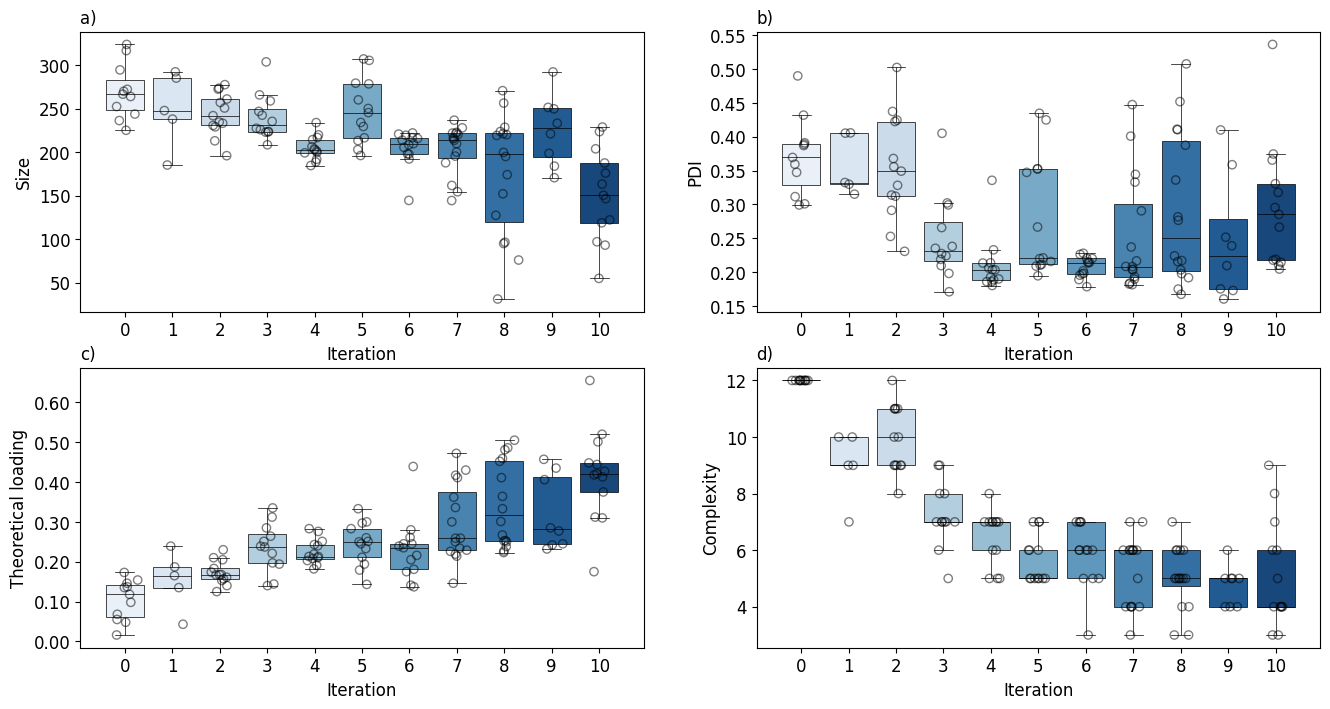

In [51]:
# plot optimization process as boxplots (formulation quality = 1)

fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Size', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
boxplot(data_to_plot, 'PDI', ax2, 'b)')

ax3 = fig.add_subplot(grid[1, 0])
boxplot(data_to_plot, 'Theoretical loading', ax3, 'c)')

ax4 = fig.add_subplot(grid[1, 1])
boxplot(data_to_plot, 'Complexity', ax4, 'd)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Boxplot.png', dpi=600)
plt.show()


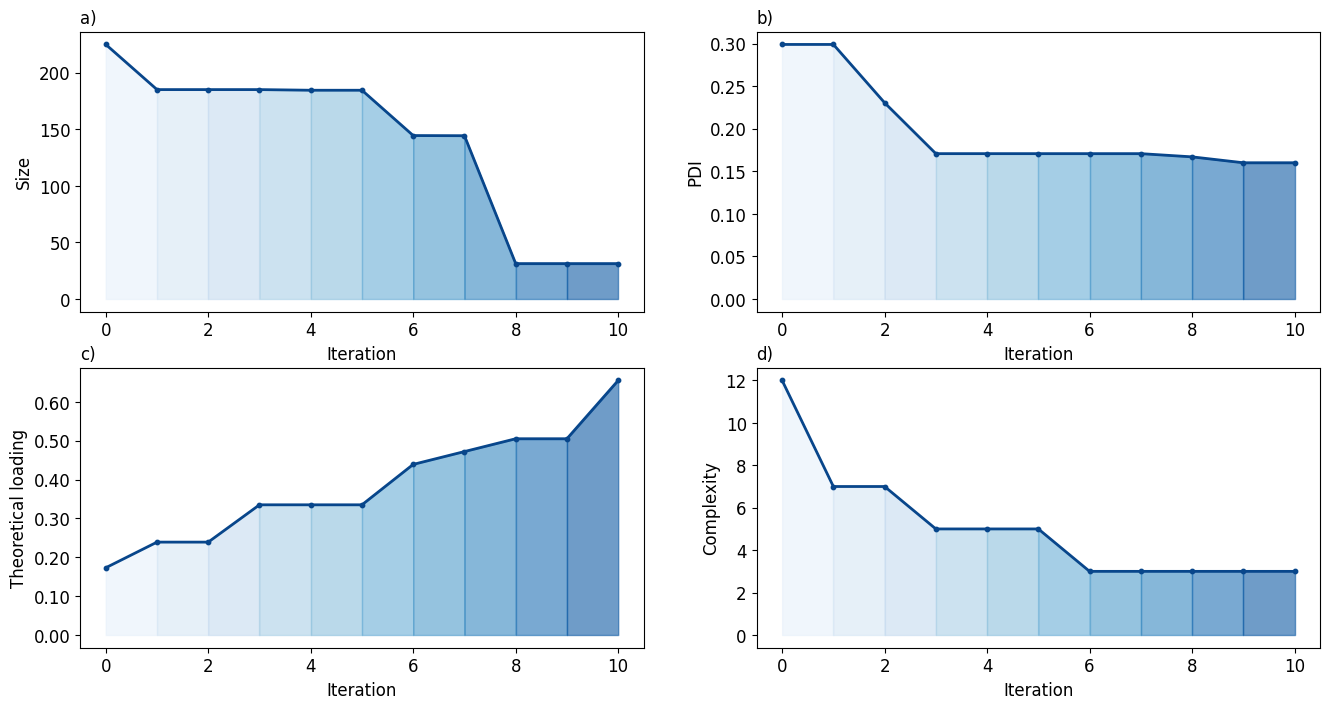

In [54]:
fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
traceplot(data_to_plot, 'Size', ax1, 'a)', minimize=True)

ax2 = fig.add_subplot(grid[0, 1])
traceplot(data_to_plot, 'PDI', ax2, 'b)', minimize=True)

ax3 = fig.add_subplot(grid[1, 0])
traceplot(data_to_plot, 'Theoretical loading', ax3, 'c)', minimize=False)  # maximize here

ax4 = fig.add_subplot(grid[1, 1])
traceplot(data_to_plot, 'Complexity', ax4, 'd)', minimize=True)

fig.patch.set(facecolor='none')
fig.savefig('Traceplot.png', dpi=600, transparent=True)
plt.show()


/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_8233/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

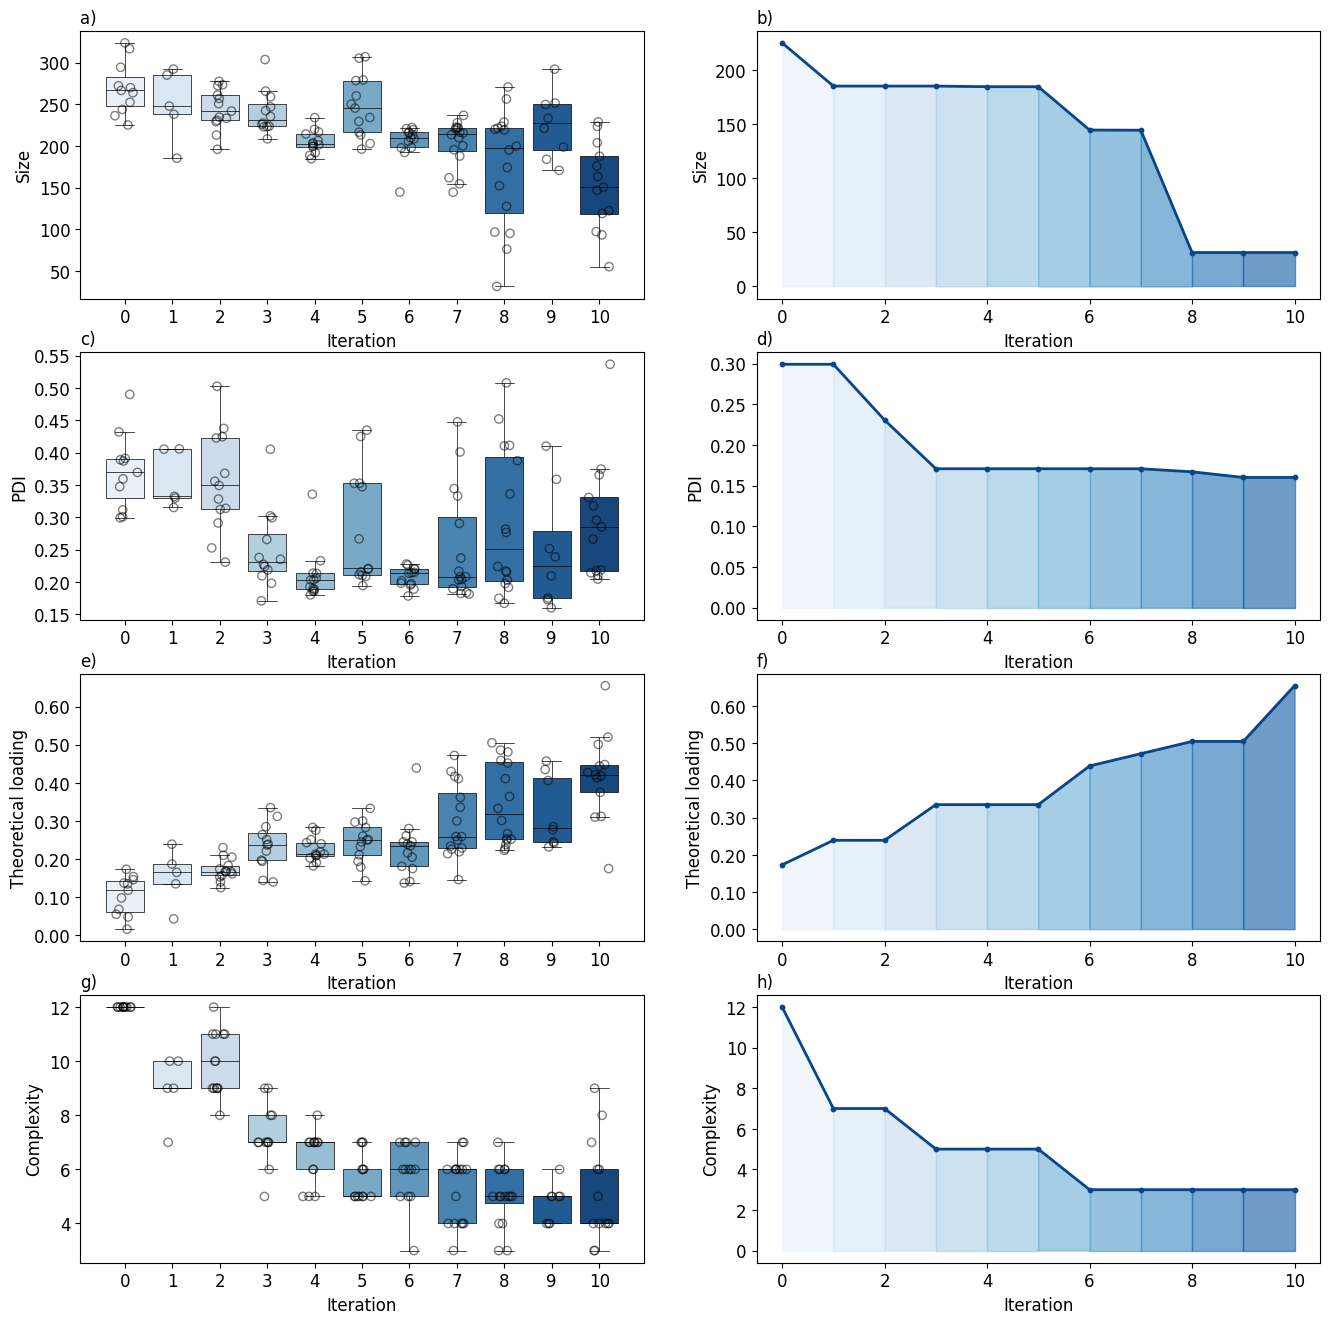

In [55]:
fig = plt.figure(figsize=(16, 16))
grid = plt.GridSpec(4, 2, wspace=0.2, hspace=0.2)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Size', ax1, 'a)')

ax2 = fig.add_subplot(grid[1, 0])
boxplot(data_to_plot, 'PDI', ax2, 'c)')

ax3 = fig.add_subplot(grid[2, 0])
boxplot(data_to_plot, 'Theoretical loading', ax3, 'e)')

ax4 = fig.add_subplot(grid[3, 0])
boxplot(data_to_plot, 'Complexity', ax4, 'g)')

ax5 = fig.add_subplot(grid[0, 1])
traceplot(data_to_plot, 'Size', ax5, 'b)', minimize=True)

ax6 = fig.add_subplot(grid[1, 1])
traceplot(data_to_plot, 'PDI', ax6, 'd)', minimize=True)

ax7 = fig.add_subplot(grid[2, 1])
traceplot(data_to_plot, 'Theoretical loading', ax7, 'f)', minimize=False)  # maximize here

ax8 = fig.add_subplot(grid[3, 1])
traceplot(data_to_plot, 'Complexity', ax8, 'h)', minimize=True)

fig.patch.set(facecolor='none')
fig.savefig('Figure_2.png', dpi=600, transparent=True)
plt.show()


/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.0f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

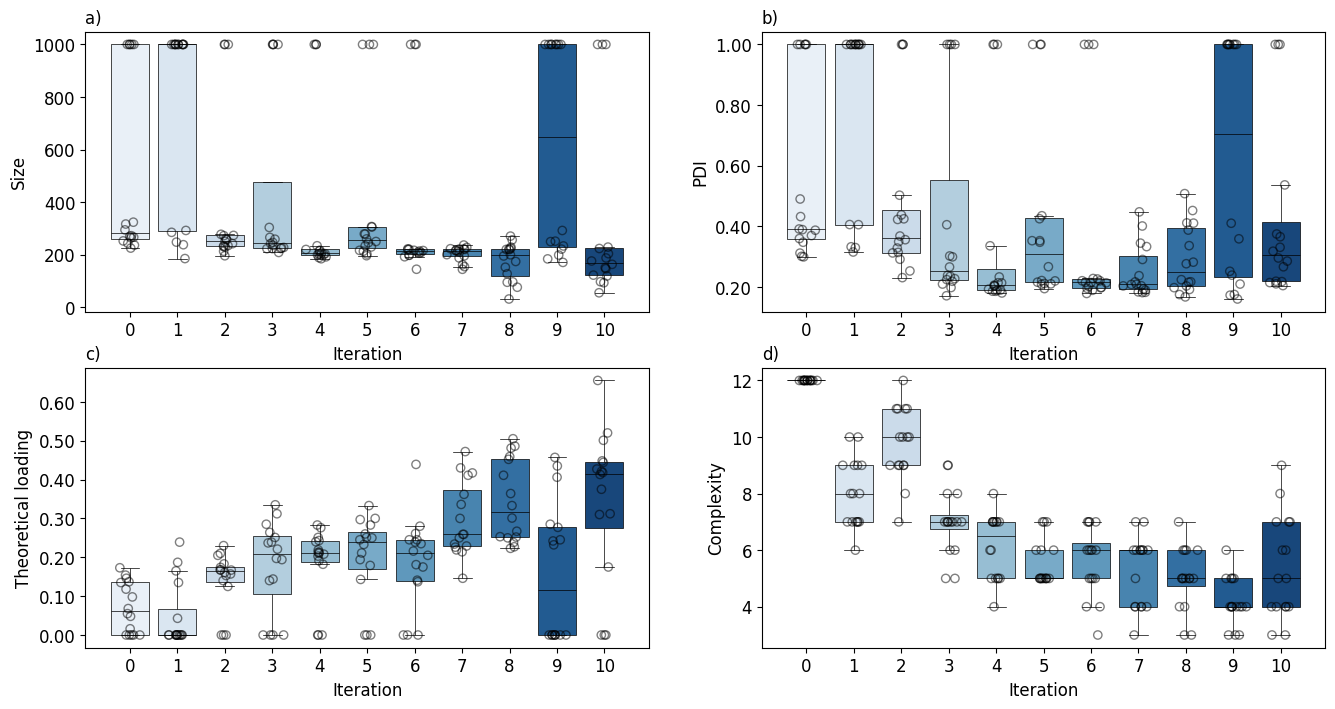

In [10]:
# plot optimization process as boxplots (all data)

fig = plt.figure(figsize=(16, 8))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)

data_to_plot = data.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Size', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
boxplot(data_to_plot, 'PDI', ax2, 'b)')

ax3 = fig.add_subplot(grid[1, 0])
boxplot(data_to_plot, 'Theoretical loading', ax3, 'c)')

ax4 = fig.add_subplot(grid[1, 1])
boxplot(data_to_plot, 'Complexity', ax4, 'd)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_S1.png', dpi=600)
plt.show()


In [11]:
# define performance metrics and data for heatmap

performance = ['Size', 'Size_STD', 'PDI', 'PDI_STD', 'Theoretical loading', 'Complexity']
data_HM = data[['Drug', 'SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3','S_1', 'S_2', 'S_3', 'Hypervolume'] + performance]

In [12]:
# Create heatmap plot

def heatmap(data_ML, ax, ann):

    # Rank formulations based on Hypervolume in descending order
    n = 10
    
    data_ML_sorted = data_ML.sort_values(by="Hypervolume", ascending=False)
    hypervolume_values = data_ML_sorted["Hypervolume"].head(n).values  
    data_ML_sorted = data_ML_sorted.drop(['Hypervolume'], axis=1)
    
    top_n = data_ML_sorted.head(n)
    top_n = top_n.drop(performance, axis=1)
    
    # Extract only excipient columns
    excipient_data = top_n.iloc[:, 1:]
    
    # Modify colormap for better contrast
    base_cmap = cm.get_cmap("Blues")
    new_cmap = mcolors.ListedColormap(base_cmap(np.linspace(0.2, 1, 256)))
    norm = mcolors.Normalize(vmin=0, vmax=1)
    
    # Generate heatmap
    sns.heatmap(excipient_data, cmap=new_cmap, norm=norm, cbar=True, linewidths=0.5, linecolor="white",
                 xticklabels=True, yticklabels=True, ax=ax)
    
    # Adjust axis labels and formatting
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    fontsize = 14
    ax.set_xlabel("")
    ax.set_ylabel(f"Top {n} Formulations", fontsize=fontsize)
    ax.set_title("", fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)

    ax.annotate(ann, xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)



/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/520780491.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Mat

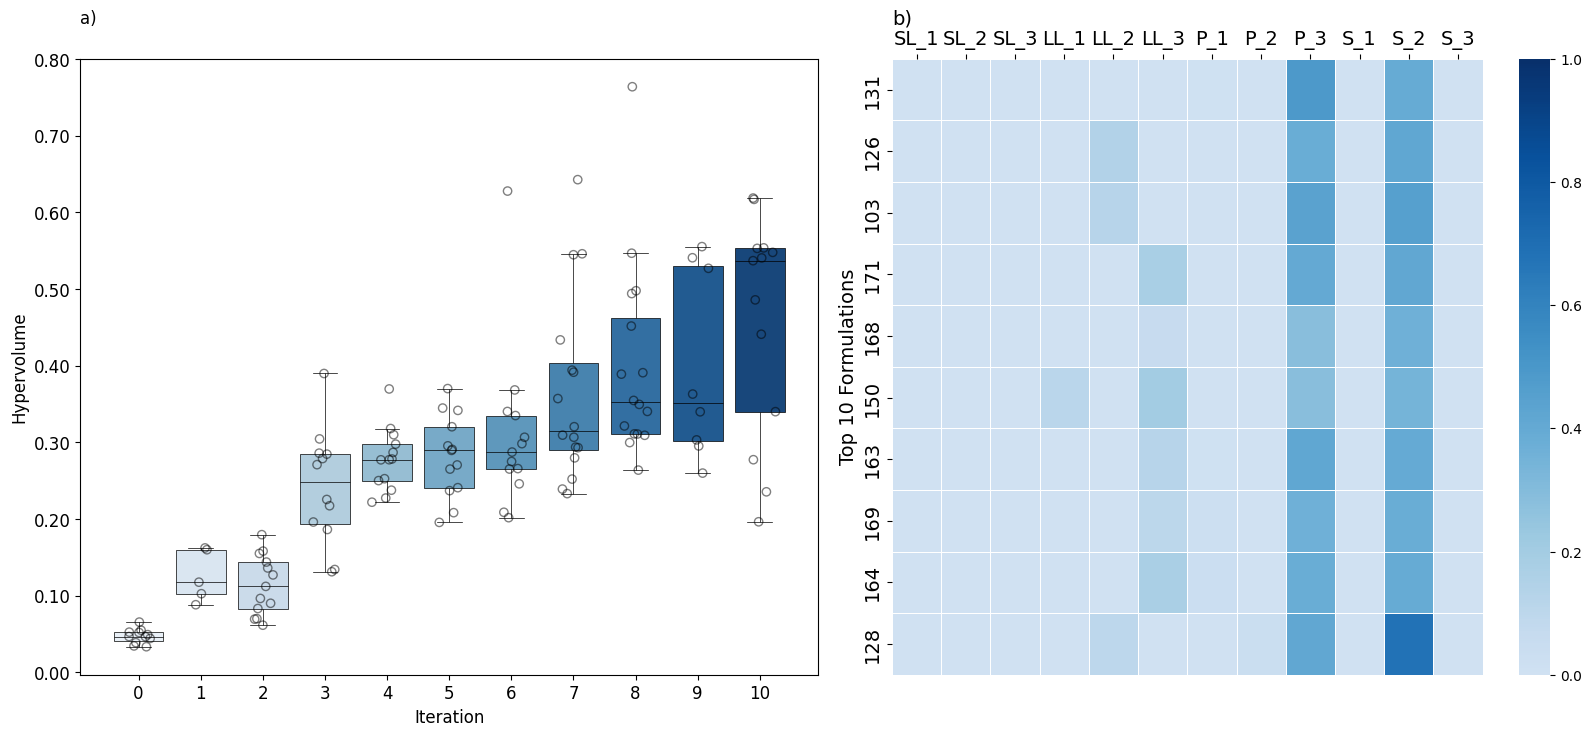

In [13]:
# Hypervolume plt (formulation quality = 1)

fig = plt.figure(figsize=(20, 8))
grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.0)

data_to_plot = data_1.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Hypervolume', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
heatmap(data_HM, ax2, 'b)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_3.png', dpi=600)
plt.show()

/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/3350201344.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick:.2f}' for tick in ax.get_yticks()], fontsize=fontsize)
/var/folders/hk/7jjnrbrj53n1t8_bmkhf0_k00000gn/T/ipykernel_20655/520780491.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Mat

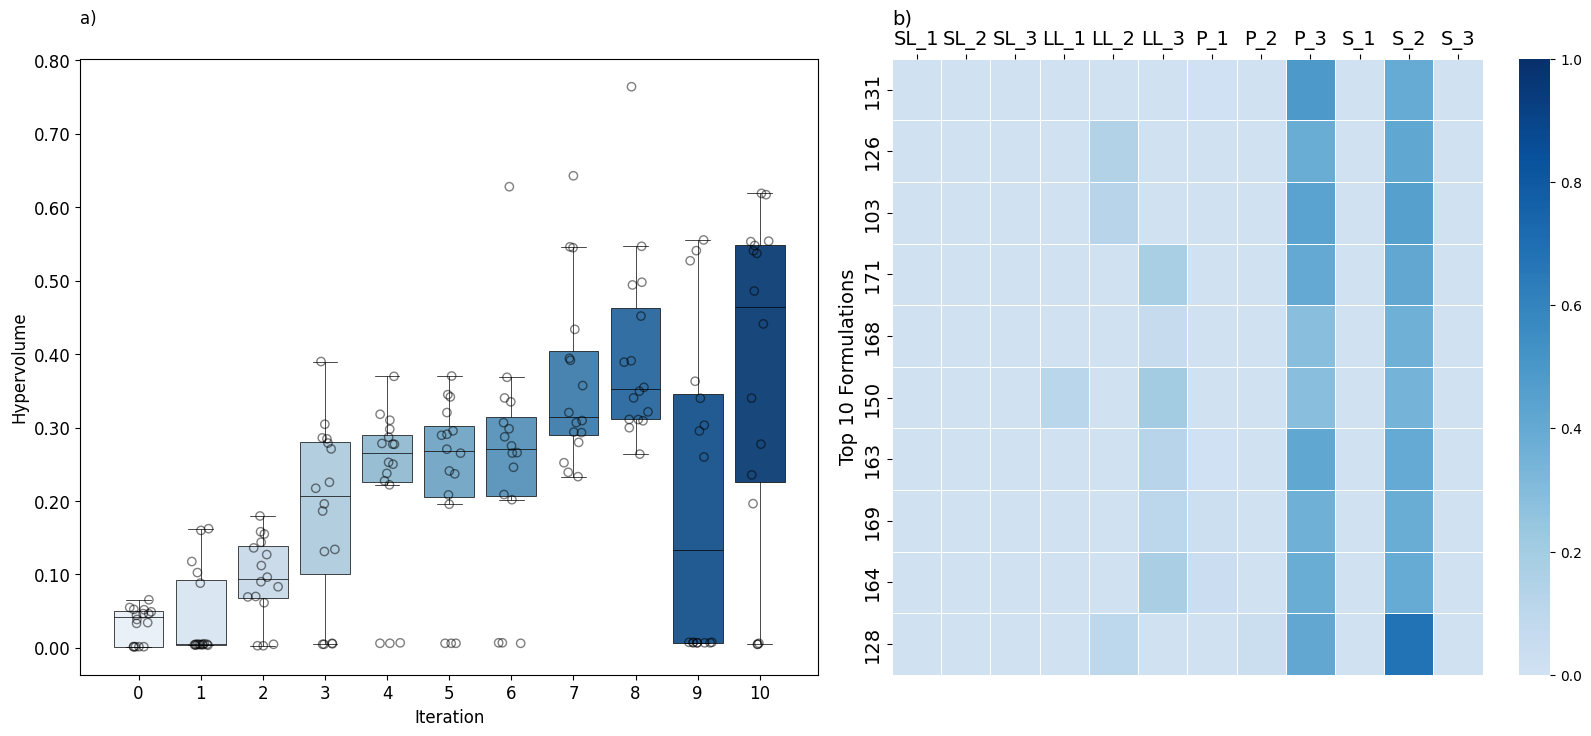

In [14]:
# Hypervolume plt (all data)


fig = plt.figure(figsize=(20, 8))
grid = plt.GridSpec(1, 2, wspace=0.1, hspace=0.0)

data_to_plot = data.copy()

ax1 = fig.add_subplot(grid[0, 0])
boxplot(data_to_plot, 'Hypervolume', ax1, 'a)')

ax2 = fig.add_subplot(grid[0, 1])
heatmap(data_HM, ax2, 'b)')

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_S2.png', dpi=600)
plt.show()

In [15]:
# Filter top 10 formulations based on Hypervolume

top_10 = data_HM.sort_values(by="Hypervolume", ascending=False).head(10)

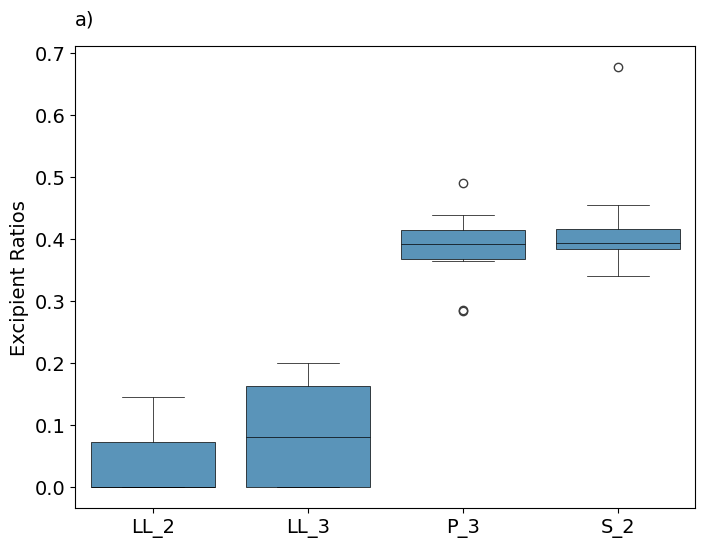

In [16]:
# Plot the excipient preferences for the top-performing formulations

fig, ax = plt.subplots(figsize=(8, 6))


blues_palette = sns.color_palette("Blues", 4)  # Adjust the number to get enough shades


sns.boxplot(
    data = top_10[['LL_2', 'LL_3', 'P_3', 'S_2']],
    color=blues_palette[2],
    linewidth=0.5,  # Set border width
    boxprops={'edgecolor': 'black'},  # Set border color
    whiskerprops={'color': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'},
    showfliers=True,  # Hide outlier circles
    ax=ax
)

fontsize = 14
#ax.set_xlabel("")
ax.set_ylabel("Excipient Ratios", fontsize=fontsize)
ax.set_title("", fontsize=fontsize)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

ax.annotate("a)", xy=(0, 1.08), xycoords="axes fraction", va="top", ha="left", fontsize=fontsize)

fig.patch.set(facecolor='none')
fig.canvas.print_figure('Figure_4a.png', dpi=600)